In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
animey = pd.read_excel(r"C:\Users\PANKAJ GUPTA\Downloads\Anime y.xlsx",header=1)

In [4]:
animey.head(2)

,Anime ID,Producers,Title,Type,Studio,Source,A/R Ratings,Members,Favorites,Episodes,...,Extracted_platforms,Platform_count,Production_Budget_in _mn,Streaming_Cost_in _mn,Merchandise_revenue_in _bn,Streaming_revenues_bn,Total revenues_in _bn,profit_in _bn,revenue/hr_in_mn,watchour/Day
0,228365,Shueisha,Police adult public,OVA,Toei Animation,Light Novel,R,784984.0,11768,35,...,"Crunchyroll, Apple TV, HBO Max",3,1771.7798,463.720569,3.933008e+05,7.651389e+06,1.267190e+07,1.267190e+07,1786.277527,17483.375510
1,29388,"Kodansha, Bandai Namco",Cup choose,ONA,MAPPA,Light Novel,PG,785465.0,50,6,...,"Netflix, Apple TV",2,5817.1548,394.799852,1.066354e+07,6.514198e+00,1.164999e+06,1.164992e+06,0.001362,113845.119048


# Anime Y

In [5]:
animey.shape

(1787, 37)

In [7]:
animey = animey[animey['release_frequency'] <=7]

In [8]:
animey = animey[animey['watch_hour_per_member'] >=100]

In [9]:
animey = animey[animey['revenue/hr_in_mn'] >=30]

In [10]:
animey.shape

(882, 37)

# categorical behaviour analysis

In [11]:
genre = animey.groupby('Genre1')

In [12]:
g1=genre.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean',
        'Watch Hours':'mean'
    }
).round(1)
g1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day,Watch Hours
Genre1,,,,,,,,,,,
Action,791056.9,30835.2,9892.0,9.0,23.2,554,720.2,86,103.0,557480.7,118035142.9
Adventure,797163.4,29125.5,9530.2,8.9,23.1,544,471.6,83,67.5,592916.2,117905169.3
Comedy,786181.2,31223.2,10516.4,8.9,23.8,512,497.0,85,71.2,963236.4,120613114.4
Drama,763798.3,28470.5,8949.9,9.1,24.0,439,543.1,72,78.0,583302.0,119934269.8
Fantasy,770265.8,30260.9,9815.5,9.0,21.8,386,533.3,59,76.3,631908.5,113741199.6
Horror,784293.1,28170.3,9961.5,9.0,23.4,553,742.4,87,106.2,1031600.5,121670466.3
Mystery,766512.6,31418.0,9662.5,9.0,22.6,567,769.2,91,110.0,466044.4,115152110.8
Romance,792118.0,29532.1,9256.9,8.9,23.8,465,750.5,73,107.3,1105912.6,121051677.2
Sci-Fi,795692.8,30047.9,9928.1,8.9,22.9,547,601.6,85,86.0,606128.6,117950562.8


In [13]:
CoV= g1.std() / g1.mean() * 100
print(CoV)

Members                 1.922578
Favorites               4.063470
User_Reviews            4.194891
Score                   0.720706
Countries_available     2.774354
awards_won             11.156508
aired_days             18.274916
Anime ID               11.291060
Episodes               18.205744
watchour/Day           30.343350
Watch Hours             2.637762
dtype: float64


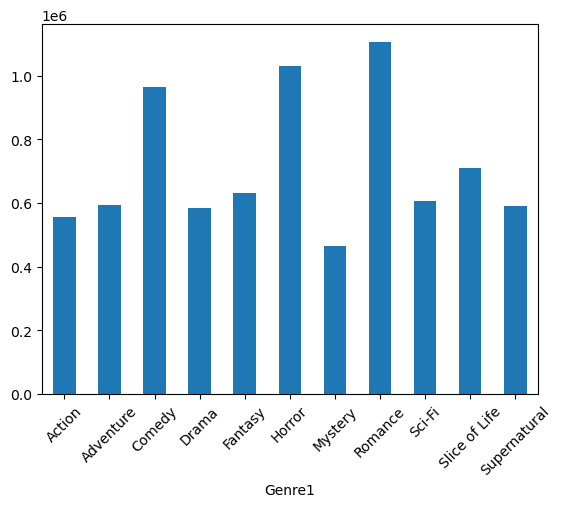

In [14]:
g1['watchour/Day'].plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [15]:
g2=genre.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
g2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
Genre1,,,,
Action,420.9,10273385.6,89.2,557480.7
Adventure,396.7,10521450.0,91.6,592916.2
Comedy,404.8,12024952.7,102.7,963236.4
Drama,427.9,10894438.1,92.9,583302.0
Fantasy,414.4,12868020.1,119.9,631908.5
Horror,413.4,11575892.7,97.1,1031600.5
Mystery,424.6,10549526.7,95.6,466044.4
Romance,407.3,9440849.8,80.4,1105912.6
Sci-Fi,402.9,11740192.0,108.6,606128.6


In [16]:
CoV= g2.std() / g2.mean() * 100
print(CoV)

Streaming_Cost_in _mn     2.764344
Streaming_revenues_bn     9.509414
revenue/hr_in_mn         10.871476
watchour/Day             30.343350
dtype: float64


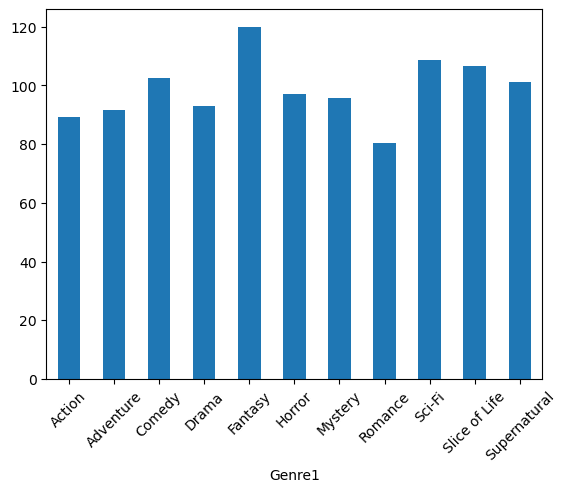

In [17]:
g2['revenue/hr_in_mn'].plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [18]:
type = animey.groupby('Type')

In [19]:
t1=type.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean',
        'Watch Hours':'mean'
    }
).round(1)
t1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day,Watch Hours
Type,,,,,,,,,,,
ONA,781676.2,30378.4,9397.9,8.9,23.2,1315,622.3,208,89.1,803774.5,121739034.9
OVA,788917.9,30090.6,9829.4,9.0,23.6,1383,695.7,214,99.5,744896.6,120873085.2
Special,789970.8,31463.4,9874.9,8.9,22.8,1398,597.5,224,85.5,578597.1,117670494.7
TV,784955.3,28351.7,9874.6,9.1,23.2,1490,665.7,236,95.2,726149.5,117208355.0


In [20]:
CoV= t1.std() / t1.mean() * 100
print(CoV)

Members                 0.484176
Favorites               4.288705
User_Reviews            2.379409
Score                   1.066771
Countries_available     1.407753
awards_won              5.158564
aired_days              6.796286
Anime ID                5.560567
Episodes                6.756265
watchour/Day           13.420002
Watch Hours             1.900000
dtype: float64


In [21]:
t2=type.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
t2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
Type,,,,
ONA,406.7,11131656.3,95.9,803774.5
OVA,403.5,10754460.3,91.5,744896.6
Special,397.7,11439295.2,99.7,578597.1
TV,429.3,11846626.3,105.3,726149.5


In [22]:
CoV= t2.std() / t2.mean() * 100
print(CoV) 

Streaming_Cost_in _mn     3.382334
Streaming_revenues_bn     4.102603
revenue/hr_in_mn          5.967150
watchour/Day             13.420002
dtype: float64


In [23]:
rating = animey.groupby('A/R Ratings')

In [24]:
r1=rating.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean',
        'Watch Hours':'mean'
    }
).round(1)
r1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day,Watch Hours
A/R Ratings,,,,,,,,,,,
G,788426.1,29705.4,9944.0,9.0,23.4,1503,697.0,235,99.8,694572.0,118938321.9
PG,779757.9,30465.6,9958.6,8.9,22.7,1299,686.5,203,98.2,717744.5,116054550.6
PG-13,790931.6,29658.6,9485.7,9.0,23.2,1418,553.3,226,79.2,813033.3,121303571.8
R,785772.7,30407.2,9625.9,9.0,23.5,1366,647.0,218,92.5,618797.8,120567593.7


In [25]:
CoV= r1.std() / r1.mean() * 100
print(CoV)

Members                 0.610094
Favorites               1.452545
User_Reviews            2.414318
Score                   0.557103
Countries_available     1.534063
awards_won              6.165603
aired_days             10.126220
Anime ID                6.157343
Episodes               10.123637
watchour/Day           11.259200
Watch Hours             1.952630
dtype: float64


In [26]:
r2=rating.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
r2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
A/R Ratings,,,,
G,422.5,11112242.2,97.4,694572.0
PG,391.4,11765399.1,106.5,717744.5
PG-13,413.0,10894970.5,92.9,813033.3
R,409.5,11527654.5,97.3,618797.8


In [27]:
CoV= r2.std() / r2.mean() * 100
print(CoV)

Streaming_Cost_in _mn     3.181528
Streaming_revenues_bn     3.477153
revenue/hr_in_mn          5.801263
watchour/Day             11.259200
dtype: float64


In [28]:
day = animey.groupby('Broadcast_Day')

In [29]:
d1=day.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean',
        'Watch Hours':'mean'
    }
).round(1)
d1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day,Watch Hours
Broadcast_Day,,,,,,,,,,,
Friday,769970.0,27680.1,9796.8,9.0,23.4,774,702.6,120,100.5,887816.1,120155510.2
Monday,776680.1,28879.6,9786.1,9.1,23.2,903,725.9,143,103.9,523451.6,117097868.0
Saturday,794077.3,29229.5,9808.0,9.0,22.7,889,732.6,140,104.9,708961.5,117957942.3
Sunday,787197.7,32472.9,9685.8,8.9,23.8,787,551.8,127,79.0,557729.4,123436034.8
Thursday,788757.7,30636.0,10071.9,9.0,22.8,838,659.5,129,94.3,664427.7,118228931.9
Tuesday,794614.7,29492.7,9344.1,8.9,23.2,778,506.9,124,72.5,838244.4,119946745.4
Wednesday,795266.8,32527.0,9741.9,9.0,23.3,617,611.9,99,87.5,873118.9,118473219.5


In [30]:
CoV= d1.std() / d1.mean() * 100
print(CoV)

Members                 1.244676
Favorites               6.100596
User_Reviews            2.213704
Score                   0.767958
Countries_available     1.593468
awards_won             11.972065
aired_days             13.723844
Anime ID               11.519334
Episodes               13.741475
watchour/Day           20.679121
Watch Hours             1.768901
dtype: float64


In [31]:
d2=day.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
d2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
Broadcast_Day,,,,
Friday,418.6,13191221.4,113.3,887816.1
Monday,412.8,12050917.6,107.1,523451.6
Saturday,407.6,10222064.5,90.0,708961.5
Sunday,410.6,11018388.5,92.0,557729.4
Thursday,415.7,11041271.4,97.3,664427.7
Tuesday,389.6,11037397.0,96.1,838244.4
Wednesday,413.6,10559914.8,91.5,873118.9


In [32]:
CoV= d2.std() / d2.mean() * 100
print(CoV)

Streaming_Cost_in _mn     2.334728
Streaming_revenues_bn     8.895282
revenue/hr_in_mn          8.946859
watchour/Day             20.679121
dtype: float64


<Axes: xlabel='Broadcast_Day'>

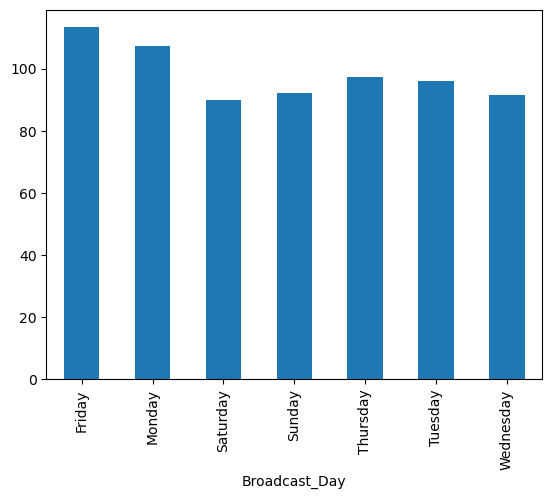

In [33]:
d2['revenue/hr_in_mn'].plot(kind='bar')

In [34]:
dub = animey.groupby('Dub Availability')

In [35]:
b1=dub.agg(
    {
        'Members':'mean',
        'Favorites':'mean',
        'User_Reviews':'mean',
        'Score ':'mean',
        'Countries_available':'mean',
        'awards_won':'sum',
        'aired_days':'mean',
        'Anime ID':'count',
        'Episodes':'mean',
        'watchour/Day':'mean',
        'Watch Hours':'mean'
    }
).round(1)
b1

,Members,Favorites,User_Reviews,Score,Countries_available,awards_won,aired_days,Anime ID,Episodes,watchour/Day,Watch Hours
Dub Availability,,,,,,,,,,,
No,779651.5,30098.8,9998.9,8.9,23.0,1843,682.4,292,97.6,788460.4,118936349.2
Partial,786809.8,30241.4,9984.4,9.0,23.4,1913,639.0,305,91.4,621580.8,119652856.2
Yes,792929.0,29769.9,9248.1,9.0,23.2,1830,614.4,285,88.0,728973.4,119243463.0


In [36]:
CoV= b1.std() / b1.mean() * 100
print(CoV)

Members                 0.844988
Favorites               0.805037
User_Reviews            4.406392
Score                   0.643885
Countries_available     0.862069
awards_won              2.397585
aired_days              5.335842
Anime ID                3.452004
Episodes                5.271747
watchour/Day           11.862197
Watch Hours             0.301371
dtype: float64


In [37]:
b2=dub.agg(
    {
        'Streaming_Cost_in _mn':'mean',
        'Streaming_revenues_bn':'mean',
        'revenue/hr_in_mn':'mean',
        'watchour/Day':'mean'
    }
).round(1) 
b2

,Streaming_Cost_in _mn,Streaming_revenues_bn,revenue/hr_in_mn,watchour/Day
Dub Availability,,,,
No,402.5,12059719.0,105.3,788460.4
Partial,409.9,11097879.8,96.6,621580.8
Yes,416.8,10767556.8,93.0,728973.4


In [38]:
CoV= b2.std() / b2.mean() * 100
print(CoV)

Streaming_Cost_in _mn     1.745393
Streaming_revenues_bn     5.936379
revenue/hr_in_mn          6.433128
watchour/Day             11.862197
dtype: float64


# monte carlo 

In [39]:
budget_Y = 10000
num_simulations = 1000

In [40]:
def monte_carlo_animeY(animey, budget, num_simulations):
    results = []
    
    for _ in range(num_simulations):
        sampled_animey = animey.sample(frac=1, replace=False).reset_index(drop=True)
        total_cost = 0
        selected_anime = []
        for _, row in sampled_animey.iterrows():
            if total_cost + row["Streaming_Cost_in _mn"] <= budget:
                selected_anime.append(row)
                total_cost += row["Streaming_Cost_in _mn"]
        selected_animey = pd.DataFrame(selected_anime)
        scenario_result = {
            "Sum_Streaming_Revenues_bn": selected_animey["Streaming_revenues_bn"].sum(),
            "Avg_Revenue_per_Hour_mn": selected_animey["revenue/hr_in_mn"].mean(),
            "Avg_Score": selected_animey["Score "].mean(),
            "Avg_Watch_Hour_per_Member": selected_animey["watch_hour_per_member"].mean(),
            "Avg_Members": selected_animey["Members"].mean(),
            "Total_Cost_mn": total_cost,
            "Selected_Anime_IDs": selected_animey["Anime ID"].tolist(),
            "total_revenue": selected_animey["Total revenues_in _bn"].sum()
        }
        results.append(scenario_result)
    return pd.DataFrame(results)

In [41]:
results = monte_carlo_animeY(animey, budget_Y, num_simulations)

In [42]:
results

,Sum_Streaming_Revenues_bn,Avg_Revenue_per_Hour_mn,Avg_Score,Avg_Watch_Hour_per_Member,Avg_Members,Total_Cost_mn,Selected_Anime_IDs,total_revenue
0,3.011750e+08,102.342012,8.884615,152.397496,791422.230769,9954.401604,"[124149, 124463, 82370, 112361, 224484, 125970...",2.565886e+08
1,2.692563e+08,97.695407,9.199130,157.382070,771928.086957,9943.084583,"[295115, 111322, 206074, 43856, 100014, 89571,...",2.359837e+08
2,1.830770e+08,71.311742,8.978696,152.886343,788306.608696,9985.434105,"[140704, 158748, 238452, 138018, 188930, 23322...",2.339050e+08
3,3.104806e+08,112.731988,8.977308,144.454001,826056.692308,9979.134157,"[185335, 166093, 36196, 76340, 124149, 214537,...",3.081068e+08
4,2.246200e+08,75.355256,8.935833,167.558349,758765.583333,9935.397466,"[283059, 294819, 98848, 222867, 281309, 89553,...",2.380544e+08
...,...,...,...,...,...,...,...,...
995,3.688525e+08,115.030861,8.672780,171.042165,752906.677146,9948.015563,"[173322, 281925, 230199, 217705, 416, 231243, ...",2.208433e+08
996,2.847015e+08,97.866854,8.940400,147.529488,821795.840000,9989.038967,"[273277, 142867, 257929, 175943, 197480, 15573...",2.341732e+08
997,3.536728e+08,133.087473,9.188182,158.186180,787692.363636,9991.630988,"[244029, 258199, 282171, 98332, 137065, 16569,...",2.413489e+08
998,2.045601e+08,76.006713,8.991250,159.113217,784706.166667,9988.219858,"[226138, 130384, 258565, 166677, 277471, 16360...",1.969224e+08


In [43]:
results.to_excel('animeY_simulated.xlsx')

In [44]:
import seaborn as sns
sns.set(style="whitegrid")

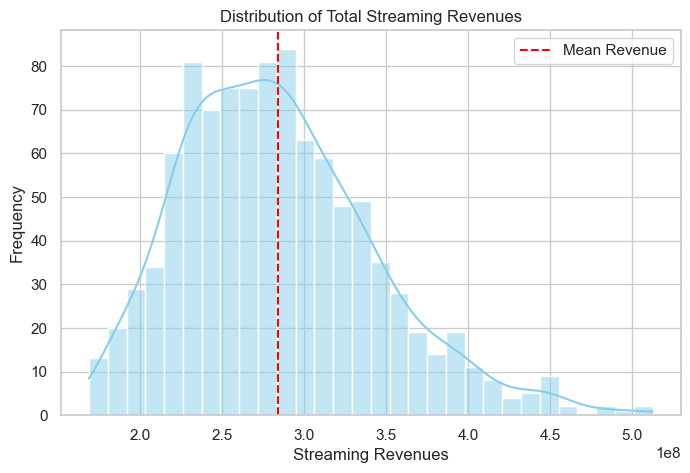

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(results["Sum_Streaming_Revenues_bn"], bins=30, kde=True, color="skyblue")
plt.axvline(results["Sum_Streaming_Revenues_bn"].mean(), color="red", linestyle="dashed", label="Mean Revenue")
plt.title("Distribution of Total Streaming Revenues")
plt.xlabel("Streaming Revenues")
plt.ylabel("Frequency")
plt.legend()
plt.show()

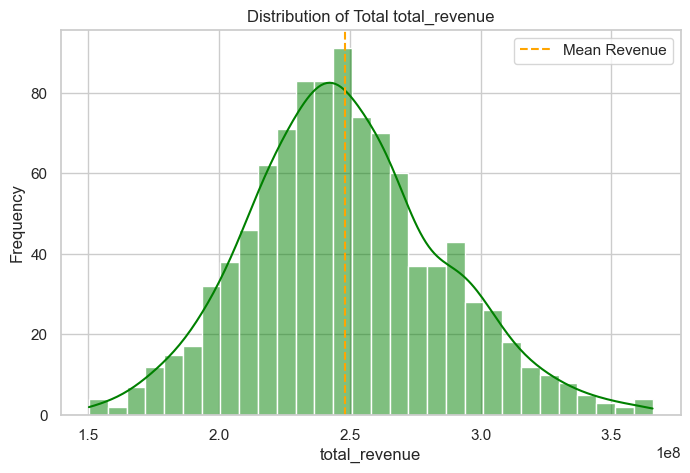

In [51]:
plt.figure(figsize=(8, 5))
sns.histplot(results["total_revenue"], bins=30, kde=True, color="green")
plt.axvline(results["total_revenue"].mean(), color="orange", linestyle="dashed", label="Mean Revenue")
plt.title("Distribution of Total total_revenue")
plt.xlabel("total_revenue")
plt.ylabel("Frequency")
plt.legend()
plt.show()

C:\Users\PANKAJ GUPTA\AppData\Local\Temp\ipykernel_32372\2404947498.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


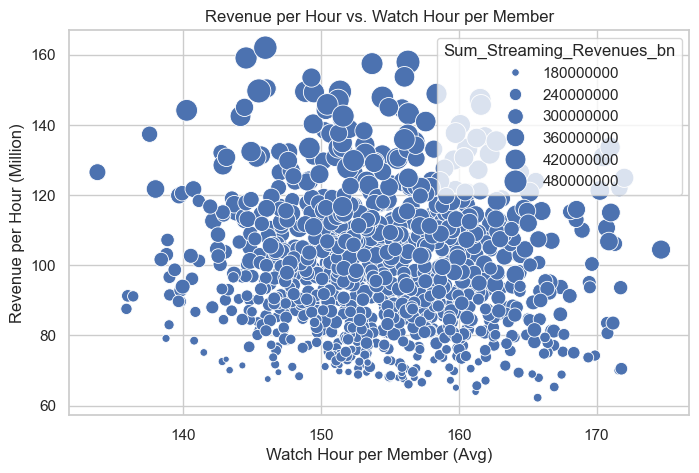

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=results["Avg_Watch_Hour_per_Member"], 
    y=results["Avg_Revenue_per_Hour_mn"], 
    size=results["Sum_Streaming_Revenues_bn"], 
    sizes=(20, 300), 
    palette="coolwarm"
)
plt.title("Revenue per Hour vs. Watch Hour per Member")
plt.xlabel("Watch Hour per Member (Avg)")
plt.ylabel("Revenue per Hour (Million)")
plt.show()

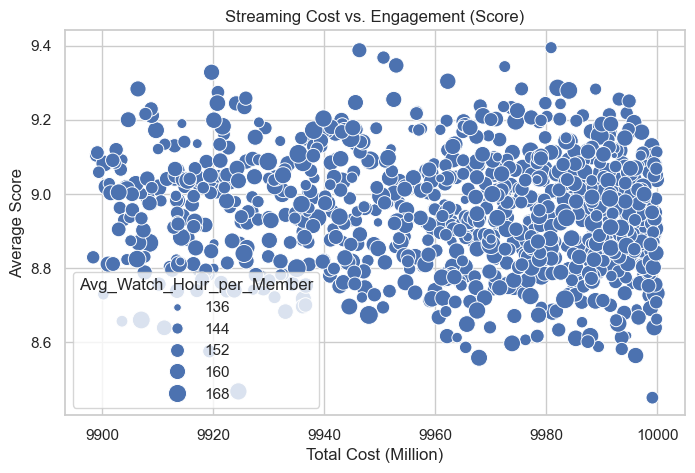

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=results["Total_Cost_mn"], 
    y=results["Avg_Score"], 
    size=results["Avg_Watch_Hour_per_Member"], 
    sizes=(20, 200)
)
plt.title("Streaming Cost vs. Engagement (Score)")
plt.xlabel("Total Cost (Million)")
plt.ylabel("Average Score")
plt.show()

In [2]:
import pandas as pd

In [3]:
results = pd.read_excel(r"C:\Users\PANKAJ GUPTA\Downloads\archive (1)\DATA From Python\animeY_simulated.xlsx")

In [4]:
results.columns

Index(['index', 'Sum_Streaming_Revenues_bn', 'Avg_Revenue_per_Hour_mn',
       'Avg_Score', 'Avg_Watch_Hour_per_Member', 'Avg_Members',
       'Total_Cost_mn', 'total_revenue', 'Anime Ids ', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')

In [6]:
results= results.drop(['index','Sum_Streaming_Revenues_bn', 'Avg_Revenue_per_Hour_mn','Avg_Score', 'Avg_Watch_Hour_per_Member','Avg_Members',
                         'Total_Cost_mn', 'total_revenue'],axis=1)

In [8]:
all_ids = results.values.flatten()

In [9]:
id_counts = pd.Series(all_ids).value_counts()

In [10]:
id_counts

168280.0    60
117182.0    58
288335.0    54
38184.0     53
9634.0      51
            ..
187134.0    15
219704.0    15
100014.0    15
227040.0    15
178220.0    14
Name: count, Length: 882, dtype: int64

In [12]:
id_counts.to_excel('animey_top_movies.xlsx')